In [4]:
# Matt Garlock
# 1/25/25
# Sentiment Analysis using Sentiment140 Twitter Data Set of Kaggle

In [36]:
import pandas as pd
import numpy as np


In [38]:
# Load the dataset
data = pd.read_csv('/Users/mattgarlock/Downloads/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

# Assign column names based on Sentiment140 documentation
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Display the first few rows to check the data
data.head()


,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [39]:
# Convert sentiment values
data['sentiment'] = data['sentiment'].replace({4: 1})

# Check class distribution
print(data['sentiment'].value_counts())


sentiment
0    800000
1    800000
Name: count, dtype: int64


In [42]:
# Drop unnecessary columns
data = data.drop(columns=['id', 'date', 'query', 'user'])

# Check the updated DataFrame
data.head()


,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [44]:
# Check for missing values
print(data.isnull().sum())

# Drop duplicates
data = data.drop_duplicates()

# Verify data integrity
print(f"Dataset shape after cleaning: {data.shape}")


sentiment    0
text         0
dtype: int64
Dataset shape after cleaning: (1583691, 2)


In [46]:
data.to_csv('cleaned_sentiment140.csv', index=False)


In [48]:
# Display summary statistics
print(data.info())

# Example of text content
print(data['text'].head())


<class 'pandas.core.frame.DataFrame'>
Index: 1583691 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1583691 non-null  int64 
 1   text       1583691 non-null  object
dtypes: int64(1), object(1)
memory usage: 36.2+ MB
None
0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object


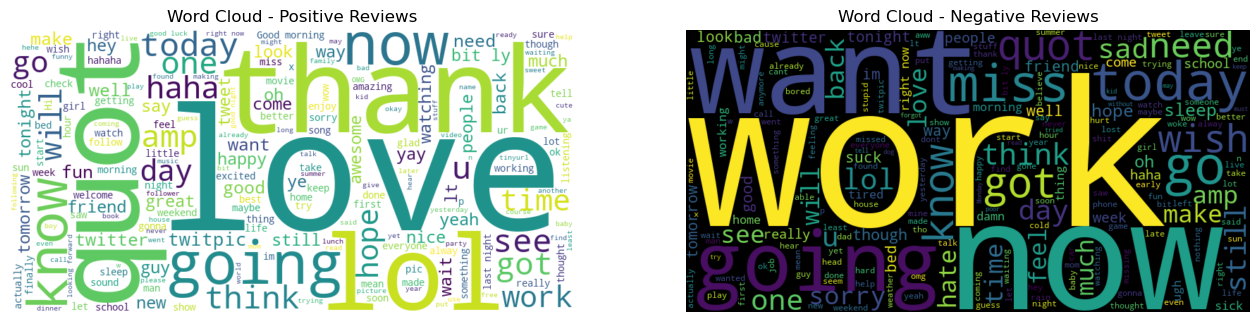

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Prepare data (convert sentiment values if necessary)
data['sentiment'] = data['sentiment'].replace({4: 1})  # Convert 4 to 1 for binary classification

# Combine all text for positive and negative reviews
positive_reviews = " ".join(data[data['sentiment'] == 1]['text'])
negative_reviews = " ".join(data[data['sentiment'] == 0]['text'])

# Generate word clouds
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wc = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

# Plot word clouds
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title("Word Cloud - Positive Reviews")
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Word Cloud - Negative Reviews")
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud', dpi=300, bbox_inches='tight')

plt.show()


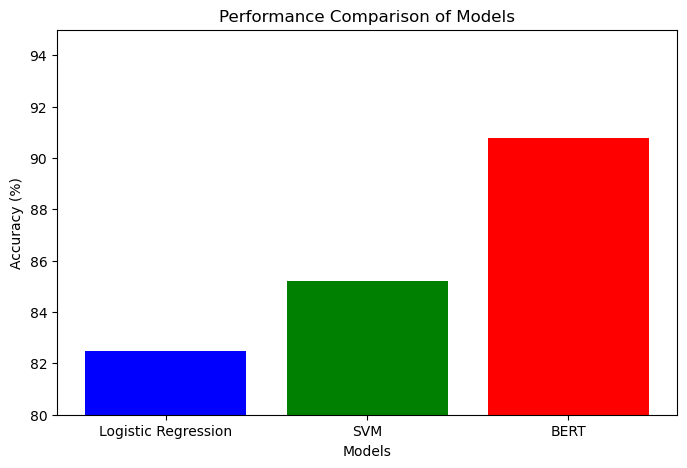

In [52]:
import matplotlib.pyplot as plt

# Example model performance (replace with actual results)
models = ['Logistic Regression', 'SVM', 'BERT']
accuracies = [82.5, 85.2, 90.8]  # Example accuracy values in %

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Performance Comparison of Models')
plt.ylim(80, 95)  # Adjust range as needed
plt.savefig('Performance Comparison of Models', dpi=300, bbox_inches='tight')
plt.show()


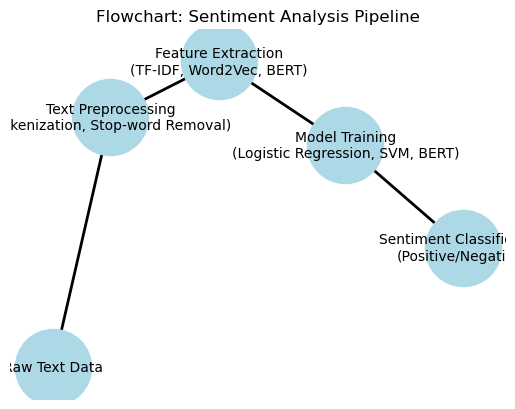

In [54]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
G.add_node("A", label="Raw Text Data")
G.add_node("B", label="Text Preprocessing\n(Tokenization, Stop-word Removal)")
G.add_node("C", label="Feature Extraction\n(TF-IDF, Word2Vec, BERT)")
G.add_node("D", label="Model Training\n(Logistic Regression, SVM, BERT)")
G.add_node("E", label="Sentiment Classification\n(Positive/Negative)")

G.add_edges_from([("A", "B"), ("B", "C"), ("C", "D"), ("D", "E")])

# Define positions for nodes
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue")

# Draw edges
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20, edge_color="black", width=2)

# Draw labels
labels = nx.get_node_attributes(G, "label")
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color="black")

# Display the flowchart
plt.title("Flowchart: Sentiment Analysis Pipeline")
plt.axis("off")
plt.savefig('Flowchart:Sentiment Analysis Pipeline', dpi=300, bbox_inches='tight')
plt.show()



In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the text data
X = vectorizer.fit_transform(data['text'])


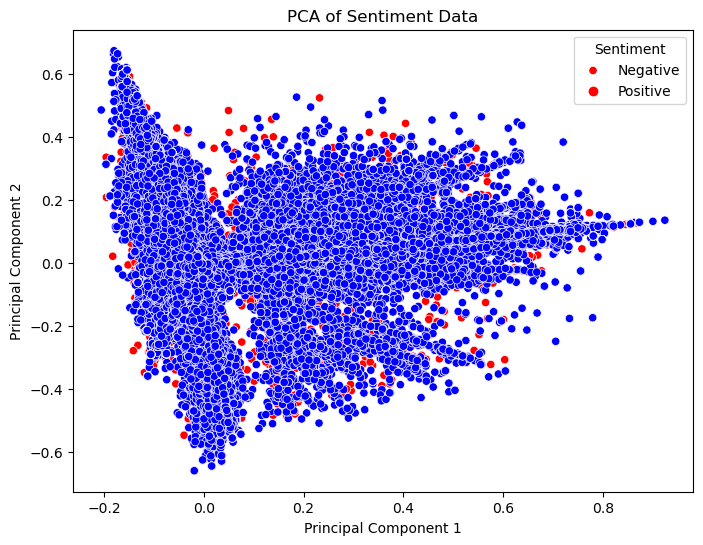

In [58]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import pandas as pd

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['text'])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Create DataFrame for PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Sentiment'] = data['sentiment']

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Sentiment', data=pca_df, palette={0: 'red', 1: 'blue'})
plt.title('PCA of Sentiment Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.savefig('PCA of Sentiment Data', dpi=300, bbox_inches='tight')
plt.show()


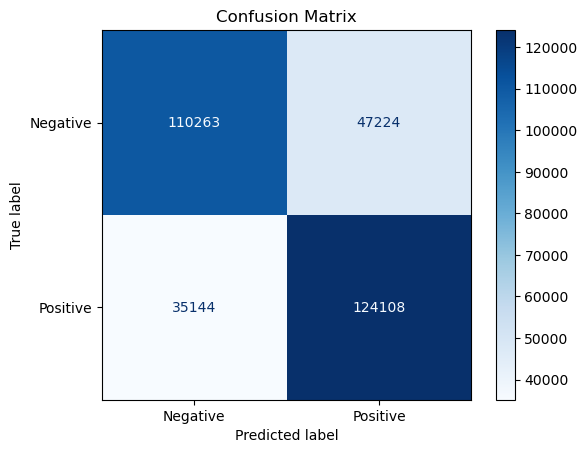

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split data (example split; adjust as needed)
X_train, X_test, y_train, y_test = train_test_split(
    vectorizer.transform(data['text']), 
    data['sentiment'], 
    test_size=0.2, 
    random_state=42
)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('Confusion Matrix of Sentiment Data', dpi=300, bbox_inches='tight')
plt.show()
